# Модели классификации
## Цель работы
Познакомиться с основными приемами работы с моделями классификации в scikit-learn.

## Задания для выполнения
1. Загрузите данные о диагностике сахарного диабета.
2. Постройте модель классификации для предсказания наличия заболевания.
3. Оцените качество построенной модели с помощью отчета о классификации и матрицы классификации.
4. Постройте альтернативную полиномиальную модель, сравните ее с предыдущей.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [31]:
y.shape, X.shape

((768,), (768, 8))

In [32]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter=1000)

In [33]:
logistic.fit(X,y)

LogisticRegression(max_iter=1000)

In [34]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.22500509e-01  3.51096168e-02 -1.32993491e-02  7.81234402e-04
 -1.17371088e-03  8.96438761e-02  8.67802515e-01  1.49845866e-02]


In [35]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.12250050883464654
Glucose 0.03510961675457151
BloodPressure -0.013299349145971289
SkinThickness 0.000781234401599035
Insulin -0.0011737108816522437
BMI 0.0896438760646158
DiabetesPedigreeFunction 0.8678025147064644
Age 0.014984586554068596


In [36]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-8.36477537]


In [37]:
y_pred = logistic.predict(X)

In [38]:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [39]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[444,  56],
       [112, 156]])

<Axes: >

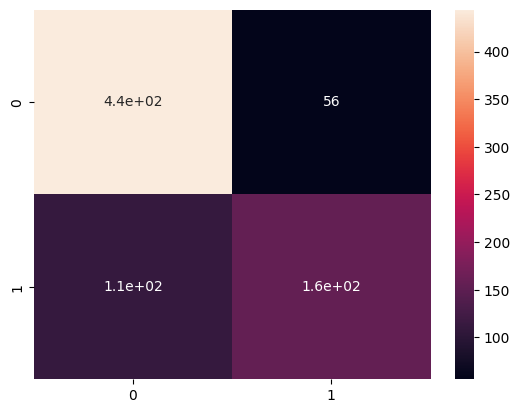

In [40]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [41]:
logistic.score(X, y)

0.78125

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poly = PolynomialFeatures(2)

In [44]:
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

In [45]:
polynomial = LogisticRegression(max_iter=10000)
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

c:\Users\sonya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
polynomial.score(poly,y)

0.7955729166666666

# Контрольные вопросы
1. Чем отличается применение разных моделей классификации в библиотеке sklearn?
Разные модели используют разные алгоритмы: например, LogisticRegression — линейное разделение, SVM — разделение с учетом опорных векторов, DecisionTree — древовидные правила. Это влияет на точность и интерпретацию.
2. Что показывает метрика точности классификации?
Точность (accuracy) — это доля правильно предсказанных объектов от общего числа (например, 0.78 = 78% верных предсказаний).
3. Какое значение имеют коэффициенты логистической регрессии?
Коэффициенты показывают, как сильно каждый признак влияет на вероятность класса 1. Положительные увеличивают вероятность, отрицательные — уменьшают.
4. Что показывает матрица классификации?
Матрица показывает, сколько объектов каждого класса предсказано правильно или ошибочно (например, [[444, 56], [149, 119]] — 444 истинных 0, 56 ложных 1 и т.д.).
5. Какие параметры имеет конструктор объекта логистической регрессии?
Основные: penalty (тип регуляризации), C (сила регуляризации), solver (алгоритм оптимизации), max_iter (максимум итераций).
6. Какие атрибуты имеет объект логистической регрессии?
Например: coef_ (коэффициенты), intercept_ (свободный член), n_iter_ (число итераций), classes_ (классы).
7. Какие параметры и атрибуты имеют объекты других моделей машинного обучения библиотеки sklearn?
Зависят от модели. Например, SVC: параметры kernel, C, атрибут support_vectors_; DecisionTreeClassifier: max_depth, атрибут feature_importances_.